# Equalização de Histograma
***
A equalização de histograma é uma ação para mudar a distribuição dos valores de ocorrência em um histograma, permitindo uma redução das diferenças acentuadas. Particularmente em imagens, é possível destacar detalhes não visíveis anteriormente. 

In [1]:
# importando o pacote de plotagem gráfica matplotlib
from matplotlib import pyplot as plt
# importando o pacote de plotagem gráfica seaborn 
import seaborn as sns
# importando o pacote de vetorização numpy 
import numpy as np

# ignorando avisos de compatibilidade das versões dos pacotes  
import warnings
warnings.filterwarnings("ignore")

## O que é um histograma de uma imagem?
***
Um histograma de uma imagem é a interpretação gráfica dos valores de intensidade de pixel da imagem. Pode ser interpretado como a estrutura de dados que armazena as frequências de todos os níveis de intensidade de pixel na imagem.

A dimensão da imagem é 1373 pixels de largura e 1200 pixels de altura.
O máximo valor de píxel na imagem é 255.0000 e o mínimo é 0.0000
A média dos valores dos píxels é 132.2714 e o desvio padrão é 41.5250


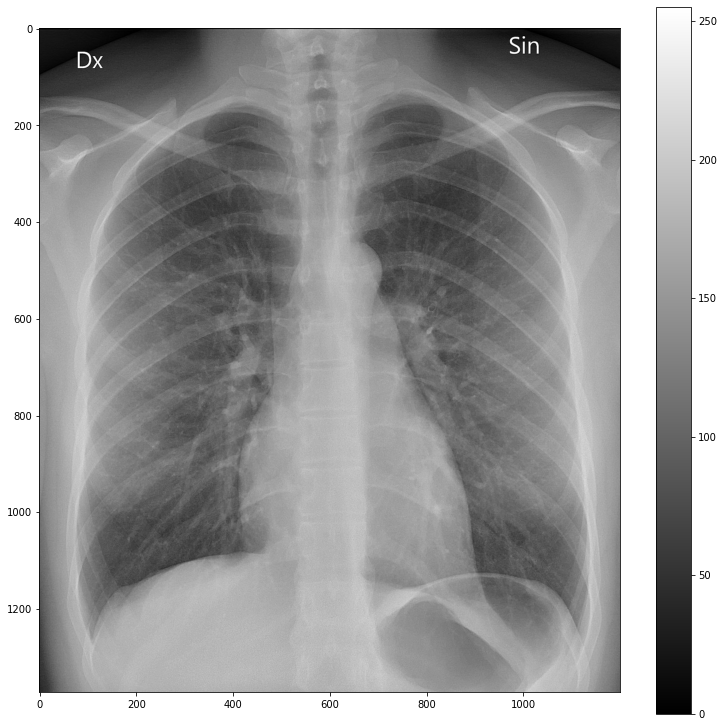

In [2]:
# carregando a imagem
image = plt.imread('assets/image1.jpg')
 
# definindo o tamanho da plotagem gráfica 
plt.figure(figsize = (13, 13))
# visualizando a imagem
plt.imshow(image, cmap = 'gray')
# adicionando uma escala de cores 
plt.colorbar()
# informações sobre a imagem
print(f"A dimensão da imagem é {image.shape[0]} pixels de largura e {image.shape[1]} pixels de altura.")
print(f"O máximo valor de píxel na imagem é {image.max():.4f} e o mínimo é {image.min():.4f}")
print(f"A média dos valores dos píxels é {image.mean():.4f} e o desvio padrão é {image.std():.4f}")

In [3]:
# convertendo a imagem em um numpy array
image = np.asarray(image)
# colocando as imagens em um array 1-dimensional
flatten = image.flatten()

Text(0, 0.5, '# Píxels na imagem')

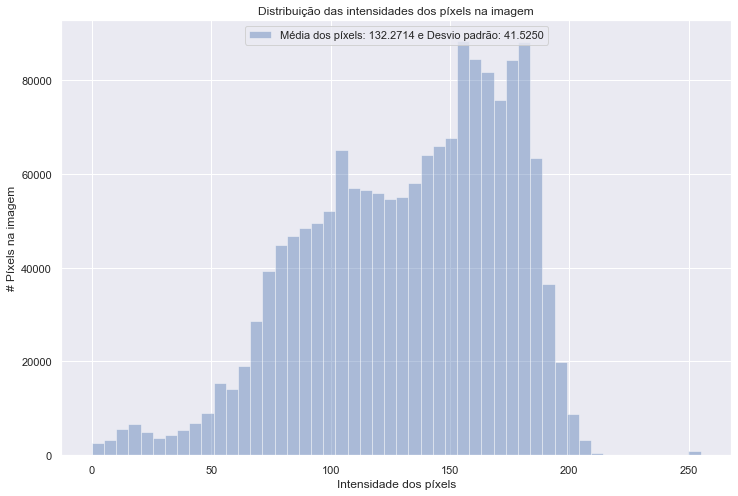

In [4]:
# organizando tamanho da imagem 
sns.set(rc = {'figure.figsize':(12,8)})
# visualizando um historiograma da distribuição dos pixels
sns.distplot(flatten, label = f'Média dos píxels: {np.mean(flatten):.4f} e Desvio padrão: {np.std(flatten):.4f}', kde = False)
# adicionando detalhes ao gráfico
plt.legend(loc = 'upper center')
plt.title('Distribuição das intensidades dos píxels na imagem') 
plt.xlabel('Intensidade dos píxels')
plt.ylabel('# Píxels na imagem')

Como podemos ver na imagem acima, o eixo X representa os níveis de intensidade de pixel da imagem. O nível de intensidade normalmente varia de 0 a 255. Para uma imagem em escala de cinza, há apenas um histograma, enquanto uma imagem colorida RGB terá três histogramas 2-D - um para cada cor. O eixo Y do histograma indica a frequência ou o número de pixels que possuem valores de intensidade específicos.

## O que é equalização de histograma?
***
Equalização de histograma é uma técnica de processamento de imagem que ajusta o contraste de uma imagem usando seu histograma. Para aumentar o contraste da imagem, ele espalha os valores de intensidade de pixel mais frequentes ou estende a faixa de intensidade da imagem. Ao fazer isso, a equalização do histograma permite que as áreas da imagem com menor contraste ganhem maior contraste.

![equalization-graph](assets/equalization-graph.jpg)

## Por que usar a equalização do histograma?
***
A equalização do histograma pode ser usada quando se tem imagens que parecem desbotadas porque não têm contraste suficiente. Nessas fotografias, as áreas claras e escuras se misturam, criando uma imagem mais plana, sem realces e sombras. 

A imagem que usaremos é um raio-x desbotado. Podemos fingir que somos radiologistas que desejam equalizar o raio-x para ver melhor alguns dos detalhes. Para processar a imagem, primeiro temos que organizá-la como um array. No entanto, o pacote numpy retornará automaticamente uma matriz multidimensional, sendo necessário a achatar em uma matriz unidimensional (1-dimensional):

Na matriz achatada, temos um valor de intensidade para cada pixel. Os valores variam de 0 (preto) a 255 (branco). Tudo no meio pode ser considerado um tom de cinza. Agora podemos pegar o array unidimensional e calcular o histograma da imagem com base na frequência de valores de intensidade semelhantes. A fórmula para esse processo pode ser observada abaixo. 

$$P_{x}(j) = \sum^{j}_{i = 0}P_{x}(i)$$

In [5]:
def histogram(image, bins = 255):
    '''função que cria um histograma baseado em uma imagem'''
    
    # criando um array zerado para armazenar a distribuição de píxels por valor 
    histogram = np.zeros(bins)
    
    # intera sobre os píxels da imagem o os separa por intensidade  
    for pixel in image:
        histogram[pixel] += 1
    
    return histogram

In [6]:
# obtendo um histograma para a imagem em um vetor 1-dimensional  
hist = histogram(image = flatten, bins = 256)

Agora temos nosso histograma e podemos dar o próximo passo em direção à equalização, calculando a soma cumulativa do histograma. A soma cumulativa é exatamente o que parece - a soma de todos os valores no histograma até aquele ponto, levando em consideração todos os valores anteriores.

In [7]:
def cumulative_sum(a):
    '''função que computa a soma cumulativa do histograma''' 
    
    # definindo um iterador sobre a quantidade de píxels em cada intensidade 
    a = iter(a)
    # define b como receptor do próxumo item do iterador 
    b = [next(a)]
    
    # itera sobre a quantidade de píxels em cada intensidade 
    for i in a:
        # computa a soma cumulativo do histograma 
        b.append(b[-1] + i)
        
    return np.array(b)

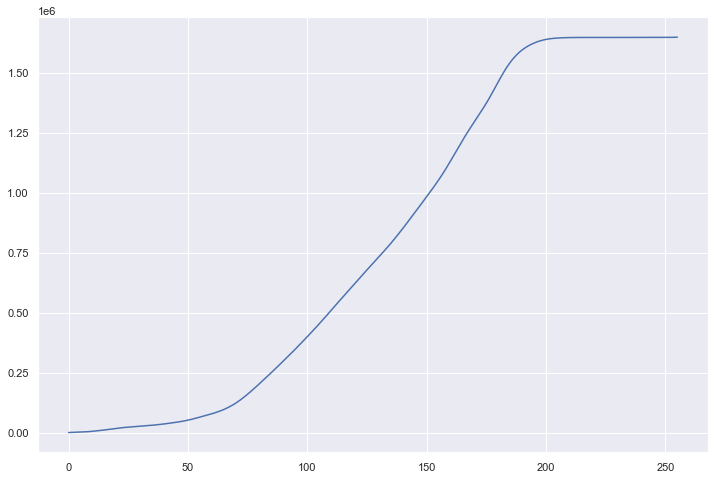

In [8]:
# obtendo a soma cumulativo do histograma 
cs = cumulative_sum(hist)
# plota o resultado obtido
plt.plot(cs)

Agora temos a soma cumulativa, mas como você pode ver, os valores são enormes. Iremos corresponder esses valores à nossa imagem original na etapa final, então temos que normalizá-los para se adequar a um intervalo de 0-255. A fórmula para esse processo pode ser vista abaixo:

$$S_{k} = \sum^{k}_{j = 0}\frac{n_{j}}{N}$$

In [9]:
def cs_equalization(cs):
    '''normalizando a soma cumulativo do histograma''' 

    # numerador e denominador da etapa de normalização 
    nj = (cs - cs.min()) * 255
    N = cs.max() - cs.min()

    # normalizando a soma cumulativo do histograma
    cs = nj / N
    
    # modificando o tipo de dado para visualização da imagem 
    cs = cs.astype('uint8')
    
    return cs 

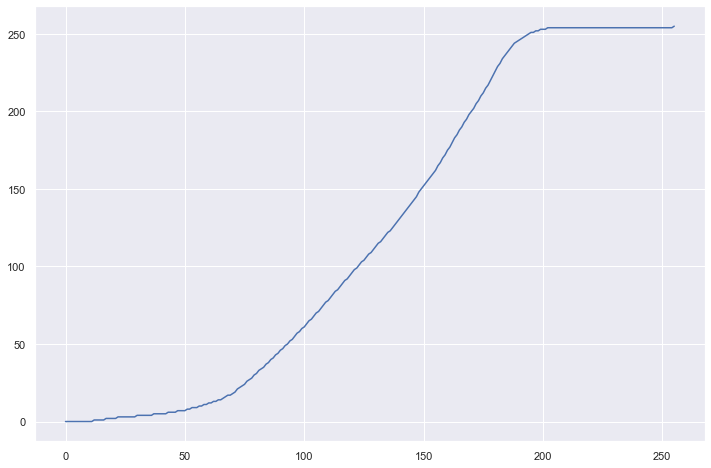

In [10]:
# normalizando a soma cumulativo do histograma
cs = cs_equalization(cs)
# plotando o resultado obtido 
plt.plot(cs)

Como esperado, a soma cumulativa está em um itervalo de 0-255. Desse modo, podemos pensar no array `cs` acima, como o vetor 1-dimensional responsável por armazenar as transformações respectivas para cada intensidade possível nos píxels da imagem. Desse modo, poderemos mapear cada intensidade dos píxels da imagem original utilizado o vetor `cs` para obter uma imagem com um melhor contraste. Em outras palavras, será aplicado a equalização de histograma na imagem. 

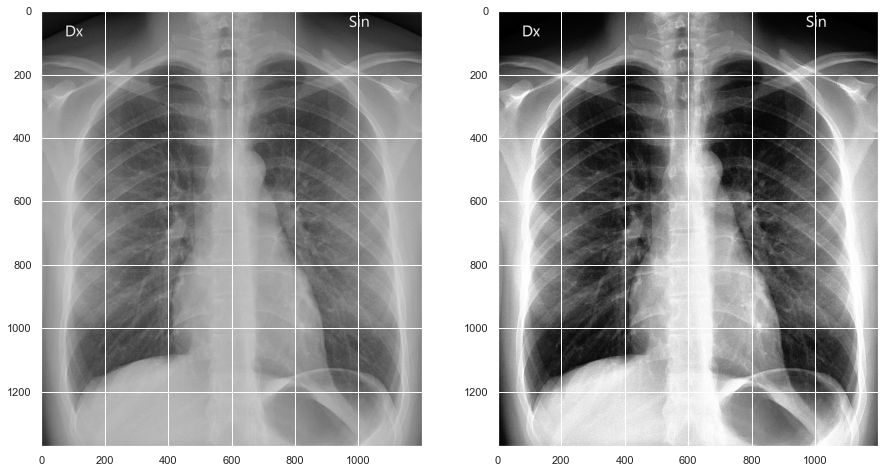

In [11]:
# transformando cada píxel da imagem utilizando o vetor cs normalizado 
img_new = cs[flatten] 

# transformando a matriz achatada 1-dimensional em suas dimensões 2-dimensional originais  
img_new = np.reshape(img_new, image.shape)

# configurando os argumentos de subplotagem do gráfico 
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

# plotando a imagem original 
fig.add_subplot(1,2,1)
plt.imshow(image, cmap='gray')

# plotando a imagem normalizada por equalização de histograma
fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')

plt.show(block=True) 

Text(0, 0.5, '# Píxels na imagem')

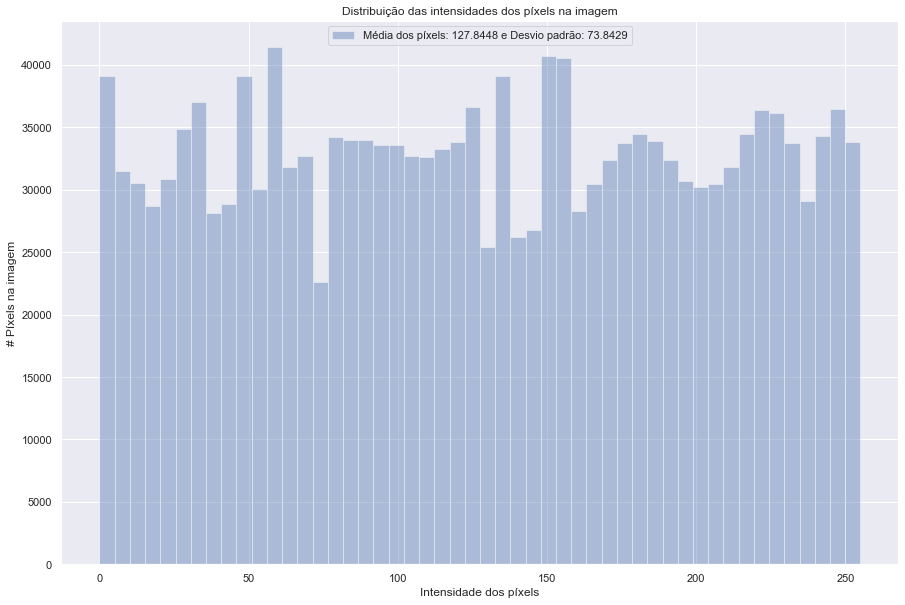

In [12]:
# organizando tamanho da imagem 
sns.set(rc = {'figure.figsize':(15,10)})
# visualizando um historiograma da distribuição dos pixels
sns.distplot(img_new.ravel(), label = f'Média dos píxels: {np.mean(img_new):.4f} e Desvio padrão: {np.std(img_new):.4f}', kde = False)
# adicionando detalhes ao gráfico
plt.legend(loc = 'upper center')
plt.title('Distribuição das intensidades dos píxels na imagem') 
plt.xlabel('Intensidade dos píxels')
plt.ylabel('# Píxels na imagem') 

A dimensão da imagem é 1373 pixels de largura e 1200 pixels de altura.
O máximo valor de píxel na imagem é 255.0000 e o mínimo é 0.0000
A média dos valores dos píxels é 127.8448 e o desvio padrão é 73.8429


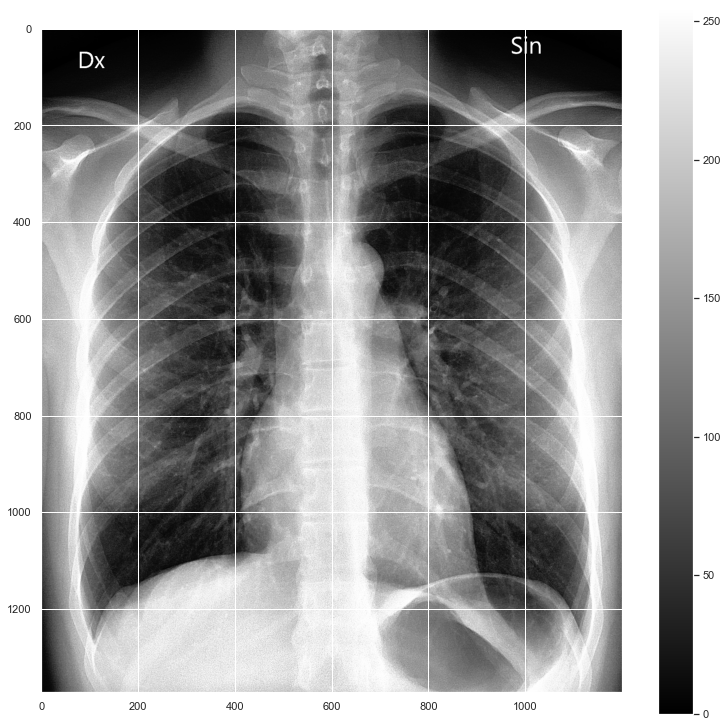

In [13]:
# definindo o tamanho da plotagem gráfica 
plt.figure(figsize = (13, 13))
# visualizando a imagem
plt.imshow(img_new, cmap = 'gray')
# adicionando uma escala de cores 
plt.colorbar()
# informações sobre a imagem
print(f"A dimensão da imagem é {img_new.shape[0]} pixels de largura e {img_new.shape[1]} pixels de altura.")
print(f"O máximo valor de píxel na imagem é {img_new.max():.4f} e o mínimo é {img_new.min():.4f}")
print(f"A média dos valores dos píxels é {img_new.mean():.4f} e o desvio padrão é {img_new.std():.4f}")

## Exemplos com imagens médicas

In [14]:
def histogram_equalization(image_file):
    '''preprocessando a imagem com equalização de histograma'''
    
    # carregando a imagem como um array numpy  
    image = plt.imread(image_file)
    # convertendo a imagem em um numpy array
    image = np.asarray(image)
    # colocando as imagens em um array 1-dimensional
    flatten = image.flatten()
    # obtendo a quantidade de píxels por intensidade
    hist = histogram(flatten, 256)
    # calculando a soma cumulativa do histograma  
    cs = cumulative_sum(hist)
    # aplicando a normalização na soma cumulativa do histograma
    cs = cs_equalization(cs) 
    # aplicando as transformações em cada umas das intensidades de píxel do vetor 1-dimensional 
    img_new = cs[flatten] 
    # redimensionando o vetor 1-dimensional para as dimensões da imagem original
    img_new = np.reshape(img_new, image.shape)
    
    return img_new

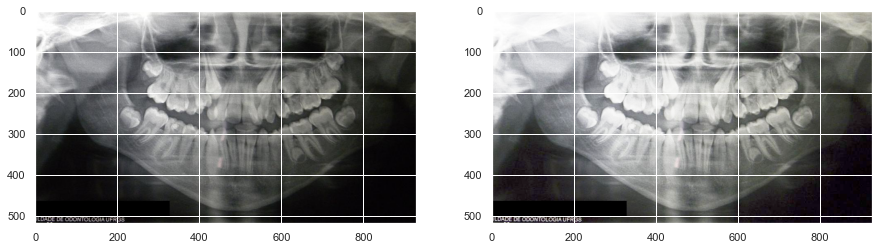

In [15]:
# carregando uma nova imagem 
image = plt.imread('assets/image2.jpg')
# convertendo a imagem em um array numpy
image = np.asarray(image)
# pre-processando a imagem baseado em equalização de histograma 
img_new = histogram_equalization('assets/image2.jpg')

# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(image, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')

plt.show(block=True) 

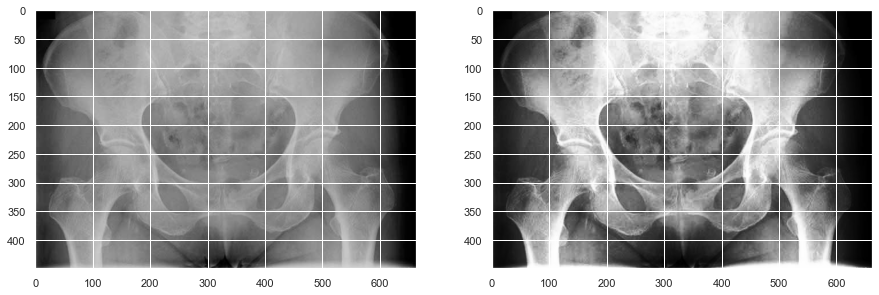

In [16]:
# carregando uma nova imagem 
image = plt.imread('assets/image3.jpg')
# convertendo a imagem em um array numpy
image = np.asarray(image)
# pre-processando a imagem baseado em equalização de histograma 
img_new = histogram_equalization('assets/image3.jpg')

# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(image, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')

plt.show(block=True) 

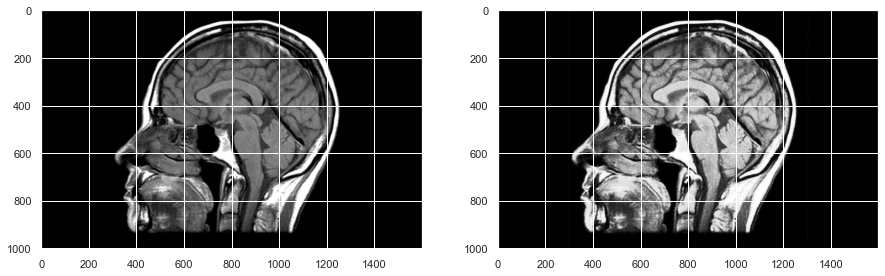

In [17]:
# carregando uma nova imagem 
image = plt.imread('assets/image4.jpg')
# convertendo a imagem em um array numpy
image = np.asarray(image)
# pre-processando a imagem baseado em equalização de histograma 
img_new = histogram_equalization('assets/image4.jpg')

# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(image, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')

plt.show(block=True) 

### Para mais detalhes consulte: [Histogram Equalization](https://en.wikipedia.org/wiki/Histogram_equalization)